## 03장 파이토치 기초

### 3.24 단순 선형 회귀(파이토치)

In [2]:
import torch
from sympy import print_tree
from torch import optim
from torch.utils.checkpoint import checkpoint

/Users/chohi/project/ai/DeepLearningDeepen/DeepLearningAdv/.venv/lib/python3.9/site-packages/torch/_subclasses/functional_tensor.py:275: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:81.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


In [4]:
x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

In [5]:
weight = torch.zeros(1, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)
learning_rate = 0.001

In [6]:
optimizer = optim.SGD([weight, bias], lr=learning_rate)

In [7]:
for epoch in range(10000):
    hypothesis = weight * x + bias
    cost = torch.mean((hypothesis - y) ** 2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Weight : {weight.item():.3f}, Bias : {bias.item():.3f}, Cost : {cost:.3f}")

Epoch : 1000, Weight : 0.864, Bias : -0.138, Cost : 1.393
Epoch : 2000, Weight : 0.870, Bias : -0.251, Cost : 1.380
Epoch : 3000, Weight : 0.873, Bias : -0.321, Cost : 1.375
Epoch : 4000, Weight : 0.875, Bias : -0.364, Cost : 1.373
Epoch : 5000, Weight : 0.877, Bias : -0.391, Cost : 1.373
Epoch : 6000, Weight : 0.878, Bias : -0.408, Cost : 1.372
Epoch : 7000, Weight : 0.878, Bias : -0.419, Cost : 1.372
Epoch : 8000, Weight : 0.878, Bias : -0.425, Cost : 1.372
Epoch : 9000, Weight : 0.879, Bias : -0.429, Cost : 1.372
Epoch : 10000, Weight : 0.879, Bias : -0.432, Cost : 1.372


### 3.25 zero_grad() 함수

In [13]:
import torch
from torch import optim


x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

weight = torch.zeros(1, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)
learning_rate = 0.001

optimizer = optim.SGD([weight, bias], lr=learning_rate)

for epoch in range(10000):
    hypothesis = weight * x + bias
    cost = torch.mean((hypothesis - y) ** 2)

    print(f"Epoch : {epoch+1:4d}")
    print(f"Step [1] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    optimizer.zero_grad()
    print(f"Step [2] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    cost.backward()
    print(f"Step [3] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    optimizer.step()
    print(f"Step [4] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    if epoch == 3:
        break

Epoch :    1
Step [1] : Gradient : None, Weight : 0.00000
Step [2] : Gradient : None, Weight : 0.00000
Step [3] : Gradient : tensor([-540.4854]), Weight : 0.00000
Step [4] : Gradient : tensor([-540.4854]), Weight : 0.54049
Epoch :    2
Step [1] : Gradient : tensor([-540.4854]), Weight : 0.54049
Step [2] : Gradient : None, Weight : 0.54049
Step [3] : Gradient : tensor([-198.9818]), Weight : 0.54049
Step [4] : Gradient : tensor([-198.9818]), Weight : 0.73947
Epoch :    3
Step [1] : Gradient : tensor([-198.9818]), Weight : 0.73947
Step [2] : Gradient : None, Weight : 0.73947
Step [3] : Gradient : tensor([-73.2604]), Weight : 0.73947
Step [4] : Gradient : tensor([-73.2604]), Weight : 0.81273
Epoch :    4
Step [1] : Gradient : tensor([-73.2604]), Weight : 0.81273
Step [2] : Gradient : None, Weight : 0.81273
Step [3] : Gradient : tensor([-26.9772]), Weight : 0.81273
Step [4] : Gradient : tensor([-26.9772]), Weight : 0.83970


### 3.26 모델선언

In [14]:
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
learning_rate = 0.001

### 3.27 순방향 연산

In [15]:
for epoch in range(10000):
    output= model(x)
    cost = criterion(output, y)


### 3.28 신경망 패치지 적용

In [1]:
import torch
from torch import optim
from torch import nn
import matplotlib.pyplot as plt

In [2]:
x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)


for epoch in range(10000):
    output= model(x)
    cost = criterion(output, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model:{list(model.parameters())} Cost : {cost.item():.6f}")



Epoch : 1000, Model:[Parameter containing:
tensor([[0.8560]], requires_grad=True), Parameter containing:
tensor([0.0286], requires_grad=True)] Cost : 1.423547
Epoch : 2000, Model:[Parameter containing:
tensor([[0.8647]], requires_grad=True), Parameter containing:
tensor([-0.1468], requires_grad=True)] Cost : 1.392081
Epoch : 3000, Model:[Parameter containing:
tensor([[0.8700]], requires_grad=True), Parameter containing:
tensor([-0.2560], requires_grad=True)] Cost : 1.379896
Epoch : 4000, Model:[Parameter containing:
tensor([[0.8734]], requires_grad=True), Parameter containing:
tensor([-0.3240], requires_grad=True)] Cost : 1.375178
Epoch : 5000, Model:[Parameter containing:
tensor([[0.8755]], requires_grad=True), Parameter containing:
tensor([-0.3663], requires_grad=True)] Cost : 1.373352
Epoch : 6000, Model:[Parameter containing:
tensor([[0.8768]], requires_grad=True), Parameter containing:
tensor([-0.3926], requires_grad=True)] Cost : 1.372644
Epoch : 7000, Model:[Parameter containing

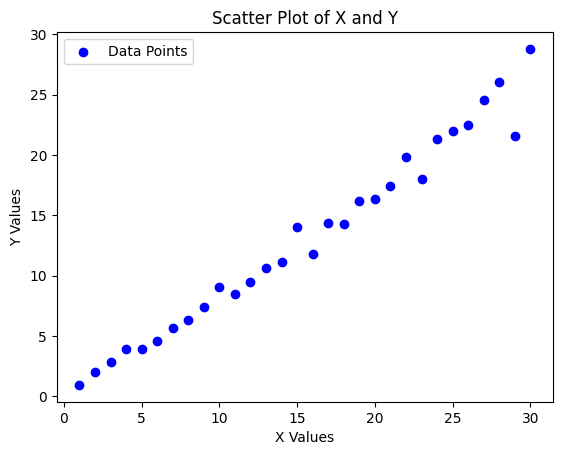

In [3]:

# PyTorch Tensor를 리스트로 변환
x_list = x.flatten().tolist()  # 1D 리스트로 변환
y_list = y.flatten().tolist()  # 1D 리스트로 변환

# 산점도 그리기
plt.scatter(x_list, y_list, color='blue', label='Data Points')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot of X and Y')
plt.legend()
plt.show()


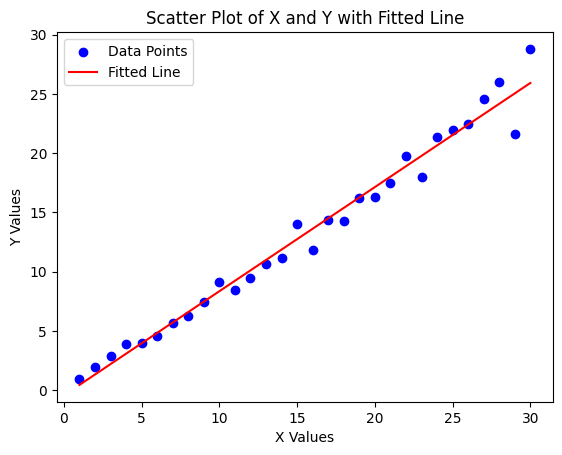

In [4]:
# 학습된 직선 예측
predicted = model(x).detach().numpy()  # 학습된 모델로 예측값 계산

# 그래프 출력
x_numpy = x.numpy().flatten()  # x를 NumPy로 변환 (1D로)
y_numpy = y.numpy().flatten()  # y를 NumPy로 변환 (1D로)

plt.scatter(x_numpy, y_numpy, color='blue', label='Data Points')  # 실제 데이터
plt.plot(x_numpy, predicted, color='red', label='Fitted Line')  # 학습한 모델의 직선
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot of X and Y with Fitted Line')
plt.legend()
plt.show()



### 3.29 기본 구조 선언

In [34]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader


train_x = torch.FloatTensor([
    [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]
])
train_y = torch.FloatTensor([
    [0.1, 1.5], [1, 2.8], [1.9, 4.1], [2.8, 5.4], [3.7, 6.7], [4.6, 8]
])

### 3.33 다중 선형 회귀

In [30]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset

train_x = torch.FloatTensor([
    [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]
])
train_y = torch.FloatTensor([
    [0.1, 1.5], [1, 2.8], [1.9, 4.1], [2.8, 5.4], [3.7, 6.7], [4.6, 8]
])

train_dataset = TensorDataset(train_x, train_y)
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=True)

In [32]:
model = nn.Linear(2, 2, bias=True)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(10000):
    cost = 0.0
    for batch in train_dataloader:
        x, y = batch
        output = model(x)

        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[0.4023, 0.4179],
        [0.6685, 0.4806]], requires_grad=True), Parameter containing:
tensor([-0.8827,  0.3531], requires_grad=True)], Cost : 0.050
Epoch : 2000, Model : [Parameter containing:
tensor([[0.4833, 0.3762],
        [0.8216, 0.4018]], requires_grad=True), Parameter containing:
tensor([-1.0053,  0.1212], requires_grad=True)], Cost : 0.013
Epoch : 3000, Model : [Parameter containing:
tensor([[0.5244, 0.3549],
        [0.8994, 0.3614]], requires_grad=True), Parameter containing:
tensor([-1.0679,  0.0030], requires_grad=True)], Cost : 0.003
Epoch : 4000, Model : [Parameter containing:
tensor([[0.5454, 0.3440],
        [0.9391, 0.3410]], requires_grad=True), Parameter containing:
tensor([-1.0997, -0.0572], requires_grad=True)], Cost : 0.001
Epoch : 5000, Model : [Parameter containing:
tensor([[0.5561, 0.3385],
        [0.9593, 0.3305]], requires_grad=True), Parameter containing:
tensor([-1.1159, -0.0878], requires_grad=True)]

### 3.43 비선형 회귀에 대한 전체 코드

In [13]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, Dataset

class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x = df.iloc[:, 0].values
        self.y = df.iloc[:, 1].values
        self.length = len(df)

    def __len__(self):
        return self.length

    def __getitem__(self, index):
        x = torch.FloatTensor([self.x[index] ** 2, self.x[index]])
        y = torch.FloatTensor([self.y[index]])
        return x, y

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2, 1)

    def forward(self, x):
        x = self.layer(x)
        return x

train_dataset = CustomDataset('../datasets/non_linear.csv')
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CustomModel().to(device)
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.0001)


for epoch in range(10000):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")


with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor(
        [
            [1 **1, 1],
            [5 **2, 5],
            [11 **2, 11]
        ]
    ).to(device)
    outputs = model(inputs)
    print(outputs)

torch.save(
    model,
    "../models/model_03_43.pt")

torch.save(
    model.state_dict(),
    "../models/model_03_43_state_dict.pt")


Epoch : 1000, Model : [Parameter containing:
tensor([[ 3.1114, -1.7001]], requires_grad=True), Parameter containing:
tensor([-0.1680], requires_grad=True)], Cost : 0.277
Epoch : 2000, Model : [Parameter containing:
tensor([[ 3.1097, -1.7026]], requires_grad=True), Parameter containing:
tensor([-0.1117], requires_grad=True)], Cost : 0.193
Epoch : 3000, Model : [Parameter containing:
tensor([[ 3.1094, -1.7026]], requires_grad=True), Parameter containing:
tensor([-0.0602], requires_grad=True)], Cost : 0.194
Epoch : 4000, Model : [Parameter containing:
tensor([[ 3.1084, -1.7029]], requires_grad=True), Parameter containing:
tensor([-0.0131], requires_grad=True)], Cost : 0.194
Epoch : 5000, Model : [Parameter containing:
tensor([[ 3.1075, -1.7028]], requires_grad=True), Parameter containing:
tensor([0.0301], requires_grad=True)], Cost : 0.166
Epoch : 6000, Model : [Parameter containing:
tensor([[ 3.1069, -1.7028]], requires_grad=True), Parameter containing:
tensor([0.0695], requires_grad=Tru

### 3.47 모델 불러오기

In [18]:
import torch
from torch import nn


class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2, 1)

    def forward(self, x):
        x = self.layer(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#model = torch.load("../models/model_03_43.pt", map_location=device)
model = torch.load("../models/model_03_43.pt", map_location=device, weights_only=False)

print(model)

with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor(
        [
            [1 ** 2, 1],
            [5 ** 2, 5],
            [11 ** 2, 11]
        ]
    ).to(device)
    outputs = model(inputs)
    print(outputs)


CustomModel(
  (layer): Linear(in_features=2, out_features=1, bias=True)
)
tensor([[  1.5988],
        [ 69.3052],
        [357.1598]])


### 3.48 모델 구조 확인

In [19]:
import torch
from torch import nn


class CustomModel(nn.Module):
    pass

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#model = torch.load("../models/model_03_43.pt", map_location=device)
model = torch.load("../models/model_03_43.pt", map_location=device, weights_only=False)

print(model)

CustomModel(
  (layer): Linear(in_features=2, out_features=1, bias=True)
)


### 3.50 모델 상태 불러오기

In [20]:
import torch
from torch import nn


class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2, 1)

    def forward(self, x):
        x = self.layer(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CustomModel().to(device)

model_state_dict = torch.load("../models/model_03_43_state_dict.pt", map_location=device,  weights_only=False)
model.load_state_dict(model_state_dict)


with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor(
        [
            [1 ** 2, 1],
            [5 ** 2, 5],
            [11 ** 2, 11]
        ]
    ).to(device)
    outputs = model(inputs)
    print(outputs)

tensor([[  1.5988],
        [ 69.3052],
        [357.1598]])


### 3.51 체크포인트 저장

In [22]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, Dataset

class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x = df.iloc[:, 0].values
        self.y = df.iloc[:, 1].values
        self.length = len(df)

    def __len__(self):
        return self.length

    def __getitem__(self, index):
        x = torch.FloatTensor([self.x[index] ** 2, self.x[index]])
        y = torch.FloatTensor([self.y[index]])
        return x, y

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2, 1)

    def forward(self, x):
        x = self.layer(x)
        return x

train_dataset = CustomDataset('../datasets/non_linear.csv')
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CustomModel().to(device)
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.0001)

checkpoint = 1
for epoch in range(10000):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        torch.save(
            {
                "model":"CustomModel",
                "epoch":epoch,
                "model_state_dict":model.state_dict(),
                "optimizer_state_dict":optimizer.state_dict(),
                "loss":cost,
                "description":f"CustomModel 체크포인트-{checkpoint}",
            },
            f"../models/model_03_51_checkpoint_{checkpoint}.pt"
        )
        checkpoint += 1
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")



Epoch : 1000, Model : [Parameter containing:
tensor([[ 3.1030, -1.7015]], requires_grad=True), Parameter containing:
tensor([0.2945], requires_grad=True)], Cost : 0.092
Epoch : 2000, Model : [Parameter containing:
tensor([[ 3.1030, -1.7029]], requires_grad=True), Parameter containing:
tensor([0.3116], requires_grad=True)], Cost : 0.090
Epoch : 3000, Model : [Parameter containing:
tensor([[ 3.1027, -1.7031]], requires_grad=True), Parameter containing:
tensor([0.3271], requires_grad=True)], Cost : 0.096
Epoch : 4000, Model : [Parameter containing:
tensor([[ 3.1023, -1.7029]], requires_grad=True), Parameter containing:
tensor([0.3413], requires_grad=True)], Cost : 0.086
Epoch : 5000, Model : [Parameter containing:
tensor([[ 3.1023, -1.7030]], requires_grad=True), Parameter containing:
tensor([0.3543], requires_grad=True)], Cost : 0.079
Epoch : 6000, Model : [Parameter containing:
tensor([[ 3.1022, -1.7031]], requires_grad=True), Parameter containing:
tensor([0.3663], requires_grad=True)],

### 3.52 체크포인트 불러오기

In [24]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, Dataset

class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x = df.iloc[:, 0].values
        self.y = df.iloc[:, 1].values
        self.length = len(df)

    def __len__(self):
        return self.length

    def __getitem__(self, index):
        x = torch.FloatTensor([self.x[index] ** 2, self.x[index]])
        y = torch.FloatTensor([self.y[index]])
        return x, y

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2, 1)

    def forward(self, x):
        x = self.layer(x)
        return x

train_dataset = CustomDataset('../datasets/non_linear.csv')
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

checkpoint = torch.load("../models/model_03_51_checkpoint_6.pt")
model.load_state_dict(checkpoint["model_state_dict"])
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
checkpoint_epoch = checkpoint["epoch"]
checkpoint_description = checkpoint["description"]

print("-------")
print(checkpoint_description)

for epoch in range(10000):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")



-------
CustomModel 체크포인트-6
Epoch : 1000, Model : [Parameter containing:
tensor([[ 3.1016, -1.7031]], requires_grad=True), Parameter containing:
tensor([0.3772], requires_grad=True)], Cost : 0.077
Epoch : 2000, Model : [Parameter containing:
tensor([[ 3.1014, -1.7031]], requires_grad=True), Parameter containing:
tensor([0.3872], requires_grad=True)], Cost : 0.083
Epoch : 3000, Model : [Parameter containing:
tensor([[ 3.1015, -1.7031]], requires_grad=True), Parameter containing:
tensor([0.3961], requires_grad=True)], Cost : 0.084
Epoch : 4000, Model : [Parameter containing:
tensor([[ 3.1015, -1.7028]], requires_grad=True), Parameter containing:
tensor([0.4045], requires_grad=True)], Cost : 0.084
Epoch : 5000, Model : [Parameter containing:
tensor([[ 3.1014, -1.7032]], requires_grad=True), Parameter containing:
tensor([0.4121], requires_grad=True)], Cost : 0.082
Epoch : 6000, Model : [Parameter containing:
tensor([[ 3.1012, -1.7029]], requires_grad=True), Parameter containing:
tensor([0.

### 3.56 이진분류

In [29]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, Dataset, random_split

class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x1 = df.iloc[:, 0].values
        self.x2 = df.iloc[:, 1].values
        self.x3 = df.iloc[:, 2].values
        self.y = df.iloc[:, 3].values
        self.length = len(df)

    def __len__(self):
        return self.length

    def __getitem__(self, index):
        x = torch.FloatTensor([self.x1[index] , self.x2[index], self.x3[index]])
        y = torch.FloatTensor([self.y[index]])
        return x, y

class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(3, 1),
            nn.Sigmoid()
            )

    def forward(self, x):
        x = self.layer(x)
        return x

dataset = CustomDataset('../datasets/binary.csv')
dataset_size = len(dataset)
train_size = int(dataset_size * 0.8)
validation_size = int(dataset_size * 0.1)
test_size = dataset_size - train_size - validation_size

train_dataset, validation_dataset, test_dataset = random_split(dataset, [train_size, validation_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=4, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=True, drop_last=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CustomModel().to(device)
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.0001)


for epoch in range(10000):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")


with torch.no_grad():
    model.eval()
    for x, y in validation_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        #loss = criterion(output, y)

        #print(f"Validation Loss : {loss:.3f}")
        print(output)
        print(outputs >= torch.tensor([0.5]).to(device))
        print("--------------------")


/var/folders/8l/dq9nhgmx5gj01xrwhwzb41s40000gn/T/ipykernel_63822/978094312.py:21: DeprecationWarning: In future, it will be an error for 'np.bool' scalars to be interpreted as an index
  y = torch.FloatTensor([self.y[index]])


Epoch : 1000, Model : [Parameter containing:
tensor([[-0.5338, -0.5675, -0.3765]], requires_grad=True), Parameter containing:
tensor([0.3279], requires_grad=True)], Cost : 0.512
Epoch : 2000, Model : [Parameter containing:
tensor([[-0.5338, -0.5675, -0.3765]], requires_grad=True), Parameter containing:
tensor([0.3279], requires_grad=True)], Cost : 0.508
Epoch : 3000, Model : [Parameter containing:
tensor([[-0.5338, -0.5675, -0.3765]], requires_grad=True), Parameter containing:
tensor([0.3279], requires_grad=True)], Cost : 0.514
Epoch : 4000, Model : [Parameter containing:
tensor([[-0.5338, -0.5675, -0.3765]], requires_grad=True), Parameter containing:
tensor([0.3279], requires_grad=True)], Cost : 0.514
Epoch : 5000, Model : [Parameter containing:
tensor([[-0.5338, -0.5675, -0.3765]], requires_grad=True), Parameter containing:
tensor([0.3279], requires_grad=True)], Cost : 0.514
Epoch : 6000, Model : [Parameter containing:
tensor([[-0.5338, -0.5675, -0.3765]], requires_grad=True), Parame